<center><h1>Data Preparation </h1></center>

In [20]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#read the data
df = pd.read_csv('source/train.csv')

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Handle the Missing Values

In [23]:
missing_values = df.isnull().sum()
missing_values[0:13]

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
#fill categorical values
df['Gender'] = df['Gender'].fillna('Not Specified')
df['Married'] = df['Married'].fillna('Not Specified')
df['Education'] = df['Education'].fillna('Not Specified')
df['Self_Employed'] = df['Self_Employed'].fillna('Not Specified')

In [25]:
#fill zero values
df['Dependents'] = df['Dependents'].fillna(0)

In [26]:
#fill mean values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [27]:
#fill mode values
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [28]:
missing_values = df.isnull().sum()
missing_values[0:13]

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encode the Data

In [29]:
from sklearn import preprocessing

In [30]:
from sklearn import preprocessing
gender = preprocessing.LabelEncoder()
gender.fit(df['Gender'])
df['Gender'] = gender.transform(df['Gender'])

In [31]:
from sklearn import preprocessing
gender = preprocessing.LabelEncoder()
gender.fit(df['Married'])
df['Married'] = gender.transform(df['Married'])

In [32]:
from sklearn import preprocessing
gender = preprocessing.LabelEncoder()
gender.fit(df['Education'])
df['Education'] = gender.transform(df['Education'])

In [33]:
from sklearn import preprocessing
gender = preprocessing.LabelEncoder()
gender.fit(df['Self_Employed'])
df['Self_Employed'] = gender.transform(df['Self_Employed'])

In [34]:
from sklearn import preprocessing
gender = preprocessing.LabelEncoder()
gender.fit(df['Property_Area'])
df['Property_Area'] = gender.transform(df['Property_Area'])

In [35]:
from sklearn import preprocessing
gender = preprocessing.LabelEncoder()
gender.fit(df['Loan_Status'])
df['Loan_Status'] = gender.transform(df['Loan_Status'])

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,2,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,2,0.0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,2,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [37]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

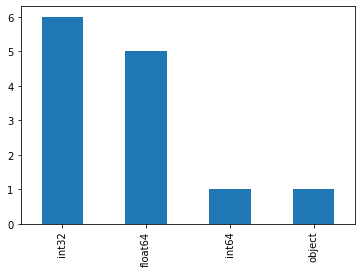

In [38]:
df.dtypes.value_counts().plot.bar()

### Finally save the Data

In [39]:
df.to_csv('new_train.csv',index=False)